# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Tuning Clusters

## Learning Objectives:

After this lesson, students will be able to:

* Use metrics to describe the composition of a cluster
* Evaluate the results of a K-means clustering analysis



# K-Means and Clustering Review

### 1. What is Unsupervised Learning?

Unsupervised learning is a method of statistical analysis that, to put it simply, is used to find interesting relationships among our data points. What distinguishes it from supervised learning is that we are not provided with variables we want to predict (ie. targets).

Within the category of unsupervised learning, _clustering_ refers to a variety of techniques for finding _subgroups_ or _clusters_.

So far, we've learned one clustering method: **K-Means Clustering**. Let's review how it works.

<details>

1. Pick a value for k (the number of clusters to create)         
2. Initialize k 'centroids' (starting points) in your data        
3. Create your clusters. Assign each point to the nearest centroid.        
4. Make your clusters better. Move each centroid to the center of its cluster.         
5. Repeat steps 3-4 until your centroids converge.        

</details>

When our clustering algorithm runs, there are two criteria we seek to optimize when forming the clusters. Any guesses on what those are?

<details>
    1. Forming clusters where observations within the same cluster are very similar     
    2. Forming clusters where observations in different clusters are very different
</details>






Now, let's get a visual representation of how our clusters to understand what good and bad clusters look like by heading to this [great online applet](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

When we generated clusters at the website above, what made a cluster good? What made it bad?

When we want to evaluate a cluster, we can do so both by visualizing the clusters or by looking at various metrics. We'll start off with some visualizations.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

We've got fish attributes, but not their species!

In [3]:
fish = pd.read_csv('assets/fish_u.csv')
fish.drop('Unnamed: 0',axis =1, inplace = True)
fish.head()

,caudal_fin,dorsal_fin,pec_fin,gill
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


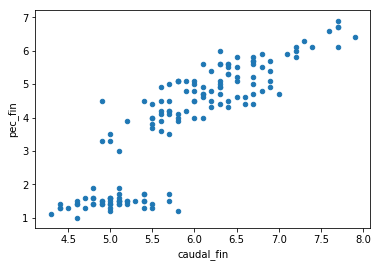

In [4]:
# As a fishologist you know that the Caudal Fin Length and Pectoral Fin Length are highly predictive of fish species.
fish.plot(kind = 'scatter', x ='caudal_fin',y ='pec_fin')

In [5]:
# As K Means is unsupervised, having a Y is not necessary for anything but evaluating.
X = fish

k = 2
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(X)

k = 4
kmeans4 = KMeans(n_clusters=k, random_state=42)
kmeans4.fit(X)

k = 6
kmeans6 = KMeans(n_clusters=k, random_state=42)
kmeans6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [6]:
labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

labels4 = kmeans4.labels_
centroids4 = kmeans4.cluster_centers_

labels6 = kmeans6.labels_
centroids6 = kmeans6.cluster_centers_
# and print the labels to take a look at what our predicted classes are.

print labels2
print centroids2
print # Blank space
print labels4
print centroids4
print # Blank space
print labels6
print centroids6

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 6.30103093  2.88659794  4.95876289  1.69587629]
 [ 5.00566038  3.36981132  1.56037736  0.29056604]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]
[[ 5.006       3.428       1.462       0.246     ]
 [ 6.2525      2.855       4.815       1.625     ]
 [ 6.9125      3.1         5.846875    2.13125   ]
 [ 5.53214286  2.63571429  3.96071429  1.22857143]]

[5 1 1 1 5 5 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 1 1 5 5 5 1 1 5 5 5 1 1 5
 5 

What are these printed values?

#### Let's evaluate these clusters. But first, we've got to decide on a metric to use. 

**Recall**: What are the two metrics we learned about last lecture?

# Inertia:

Inertia is basically the sum of squared errors for our clusters, represented mathematically here:

# $$\sum_{j=1}^{k} \sum_{i\in N_j} (||x_i - \mu_j||_2)$$

In a nutshell: it shows how dense the clusters are

Where:                                                              
$n$ is the number of points within a cluster.                          
$k$ is the number of clusters

In non-math terms: Within each cluster, we measure the distance of each point from the centroid of that cluster and square it. The total of all these sums is our inertia. So the bigger our inertia, the more spread out our points are within each cluster.

Low interia: dense cluster

### We can plot our *average* inertia vs. k and create an 'elbow point graph.'

![](assets/elbow.png)

**Question:** What might be some potential problems with using inertia as a metric?

In general, we won't use inertia as a metric when evaluating clusters.

# Silhouette score (aka silhouette coefficient):

The silhouette score, or silhouette coefficient, is the measure of how closely related a point is to members of its cluster rather than members of other clusters. In a nutshell: how well separated clusters are

# $$ s = \frac{b - a}{max(a, b)}$$


#### Where:                                            
$a$ is the mean distance between an observation and all other points in the same class. 

$b$ is the mean distance between an observation and all other points in the next nearest cluster.

Do we want a high or low silhouette score?

What is the best value?

What is the worst value?

What does a negative value indicate?

In [7]:
silhouette_score(X, labels2, metric='euclidean')

0.68104616921174665

In [8]:
silhouette_score(X, labels4, metric='euclidean')

0.49805050499728803

In [9]:
silhouette_score(X, labels6, metric='euclidean')

0.36483400396700366

So what's the best silhouette score here?

# Vizessssssss!

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68104616921174665)


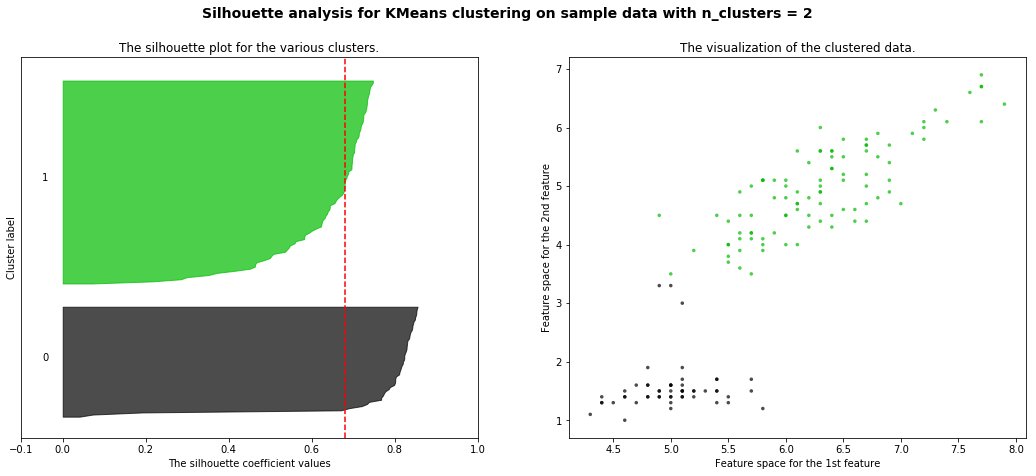

('For n_clusters =', 4, 'The average silhouette_score is :', 0.49805050499728803)


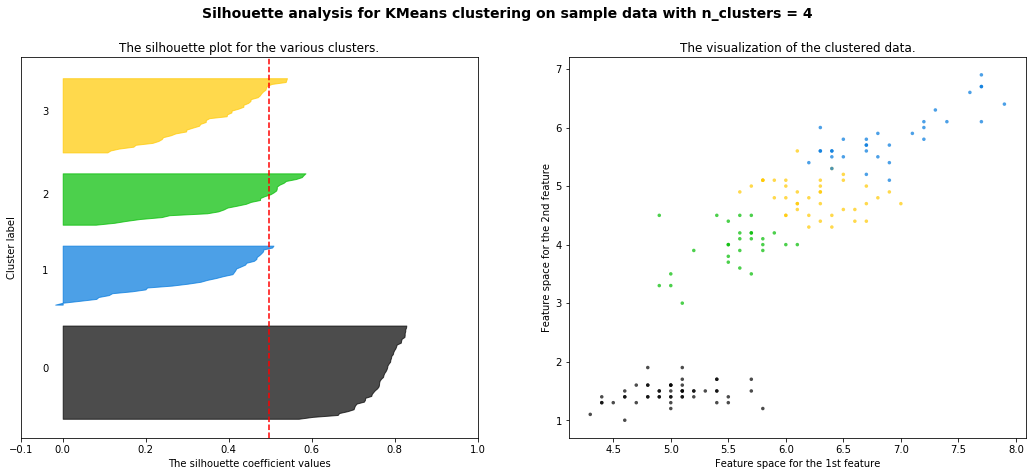

('For n_clusters =', 6, 'The average silhouette_score is :', 0.36784649847122541)


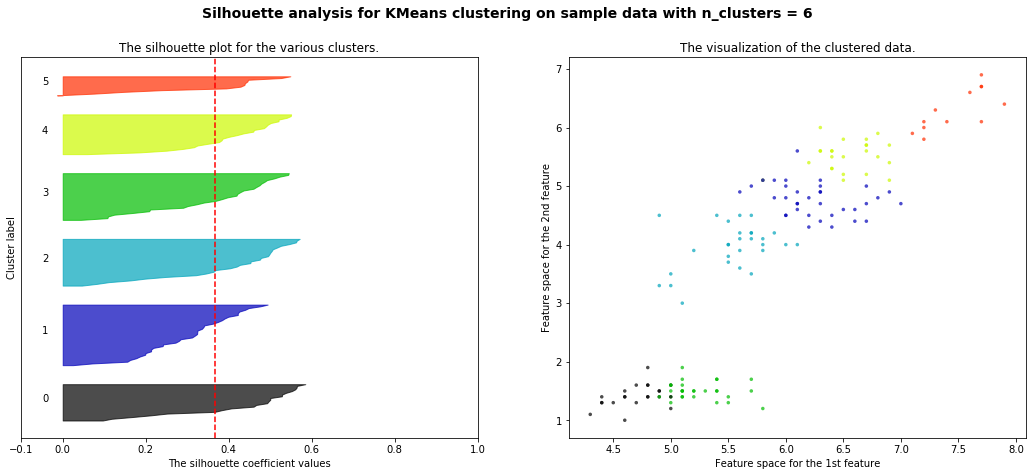

In [10]:
##I took this straight from sklearn
range_n_clusters = [2, 4, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['caudal_fin'], X['pec_fin'], marker='.', s=50, lw=0, alpha=0.7,
                c=colors)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [11]:
# Metric, K values and dataframe to append to
from sklearn.metrics import silhouette_score
kays = [2,3,4,5,6,7,8,9]
results = pd.DataFrame(columns = ['k','silhouette_score'])

for k_item in kays:
    # Sets model for each K value
    kmeans_k = KMeans(n_clusters=k_item, random_state=42)
    # fits model
    kmeans_k.fit(X)

    # Get labels for model evaluation.  Centroids if we want to use those later.
    labels_k = kmeans_k.labels_
    centroids_k = kmeans_k.cluster_centers_

    # Calculates Silhouette score.
    s_k = silhouette_score(X, labels_k ,metric='euclidean')
    # Appends information to results DF
    results.loc[len(results)] = [k_item, s_k]
results

,k,silhouette_score
0,2.0,0.681046
1,3.0,0.552819
2,4.0,0.498051
3,5.0,0.488749
4,6.0,0.364834
5,7.0,0.349748
6,8.0,0.357454
7,9.0,0.339449


# Boston housing

Now, let's use a different dataset in which we don't have two specific features we can look at visually

In [12]:
# from randomfunctions import edaBasics as eda

def eda(dataframe):
    #Ritika's EDA
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n"
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n" #Added this
    print "Dataframe Types \n \n", dataframe.dtypes,"\n"
    print "Dataframe Shape \n", dataframe.shape,"\n"
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n"
    for item in dataframe:
        print item
        print dataframe[item].nunique()

In [13]:
from sklearn.datasets import load_boston

In [14]:
data = load_boston().data
# targets = load_boston().target # Don't need these!
columns = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT".split()

In [15]:
df = pd.DataFrame(data, columns=columns)

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df = MinMaxScaler().fit_transform(df)

In [19]:
df = pd.DataFrame(df, columns=columns)

In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040322,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096626,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.040925,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
eda(df)

Missing Values 
 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64 

Duplicate Rows 
0 

Dataframe Types 
 
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object 

Dataframe Shape 
(506, 13) 

Dataframe Describe 
 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040322    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096626    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.17338

# A note on workflow:

Usually we'd have to do a lot more EDA and preprocessing, exploring distributions, removing null-values, changing categorical variables to numeric, etc. We would have to do all this before performing clustering, since clustering relies on distance computation in order to create clusters.



In [22]:
ks_dict = {}

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    ks_dict[k] = {'labels':kmeans.labels_,
                  'centroids':kmeans.cluster_centers_,
                  'inertia':kmeans.inertia_,
                  'silhouette':silhouette_score(df, kmeans.labels_, metric='euclidean')}

In [23]:
ks = []
silhouettes = []
inertias = []

for k in ks_dict:
    ks.append(k)
    silhouettes.append(ks_dict[k]['silhouette'])
    inertias.append(ks_dict[k]['inertia'])

In [24]:
import matplotlib.pyplot as plt

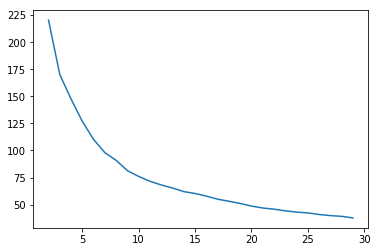

In [25]:
plt.plot(ks, inertias)

# Silhouette Score Visualization

('For n_clusters =', 2, 'The average silhouette_score is :', 0.42832390028577294)


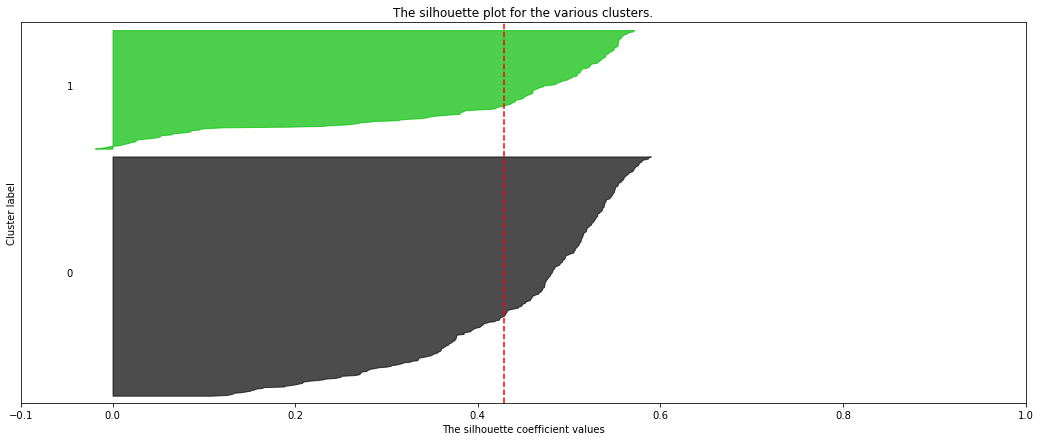

('For n_clusters =', 4, 'The average silhouette_score is :', 0.32213666797230472)


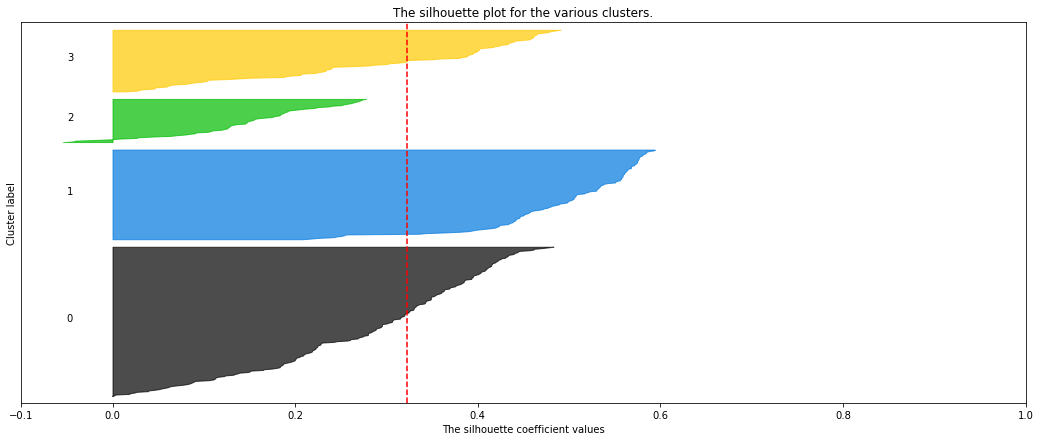

('For n_clusters =', 6, 'The average silhouette_score is :', 0.33635109690463544)


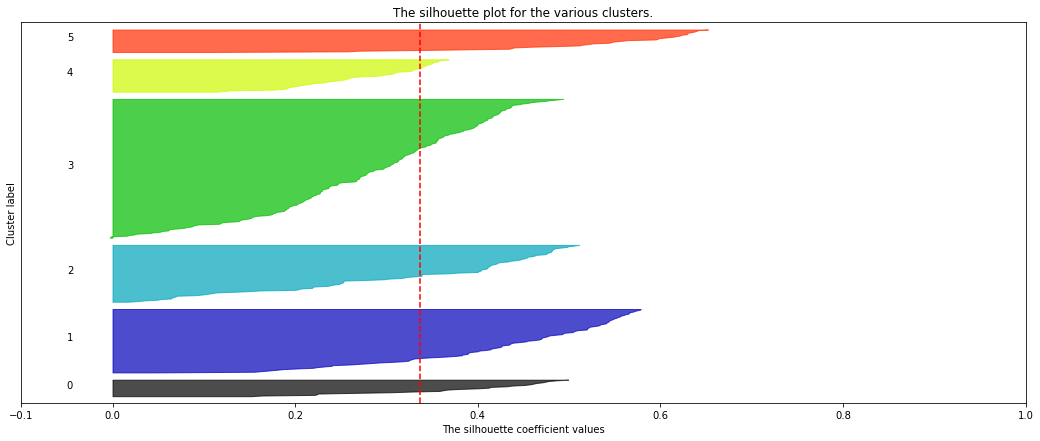

In [26]:
##I took this straight from sklearn
range_n_clusters = [2, 4, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X['caudal_fin'], X['pec_fin'], marker='.', s=50, lw=0, alpha=0.7,
#                 c=colors)

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

    plt.show()

# WARNING: LEAVING UNSUPERVISED WORLD

Clustering can also be used for supervised and semi-supervised learning. To evaluate how well it does in these situations, we can use some metrics we've seen before:

- Accuracy Score
- Confusion Matrix
- Classification Reports  

And some other ones:  

- Completeness Score
- Homogeneity
- V Measure Score

##### Completeness Score- All members of a given class are assigned to the same cluster.

* A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. (If a cluster contains all of the data points of a single class.)
* Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling

![](assets/completeness.JPG)


##### Homogeneity: each cluster contains only members of a single class.  
* A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. (Every cluster is composed of data points from only 1 class. Essentually there are representative of a class)   

* Score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling

![](assets/homogeneity.JPG)

##### V Measure Score

The V-measure is the harmonic mean between homogeneity and completeness:  

v = 2 * (homogeneity x completeness) / (homogeneity + completeness)

#### To the docs!

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## Recap:

* What does a low inertia score mean?
* What does a high silhouette score mean?
* What types of problems can we use clustering for?

## Conclusion:

* There are numerous methods for evaluating your clustering analysis (how many can you recall?)
* After analyzing clusters, you may have to go back and tune the value of "k" in your analysis
* Always examine multiple metrics to understand how our analysis performed

## Resources:

[datascience.com](https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials)